In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import keras
from keras.layers import LSTM, GRU
import tensorflow as tf
from utils import to_1dimension, create_model, plot_series_prediction

#ocultar alertas do módulo keras
tf.logging.set_verbosity(tf.logging.ERROR)

#constantes
#TEST_SIZE = .3
TIME_AHEAD = 22 #dias a prever
BATCH_SIZE = 1
UNITS = 25

df = pd.read_csv('AMZN_data.csv')
df = df.drop(['Name', 'volume'], axis=1)
#print(df.shape)
#print(df.head())

'''df.plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Days')
plt.show()'''
prices = df.open
scaler = MinMaxScaler(feature_range=(0,1))
prices = scaler.fit_transform(np.reshape(prices.values, (len(prices), 1)))
#print(prices)

In [68]:
#train, test = train_test_split(prices, test_size=TEST_SIZE, shuffle=False)
train = prices[:1000]
test = prices[1000:]
print('dimensions of train:', train.shape)
print('dimensions of test:', test.shape)

X_train, y_train = to_1dimension(train, TIME_AHEAD)
X_test, y_test = to_1dimension(test, TIME_AHEAD)

#LSTM
model = create_model(model_name='LSTM', units=UNITS, time_ahead=TIME_AHEAD)
'''Para otimização, usamos o algoritmo ADAM.
    Em séries temporais, os métodos de otimização adaptativa
    tendem a obter melhores resultados do que os métodos
    tradicionais de descida de gradiente estocástica.'''
model.compile(optimizer='nadam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=BATCH_SIZE, verbose=1)

#recuperamos os valores originais em y_test e prices
y_test_origin = scaler.inverse_transform([y_test])
prices_origin = scaler.inverse_transform(prices)

pred_test = model.predict(X_test)
pred_test = scaler.inverse_transform(pred_test)
error = mean_squared_error(y_test_origin[0], pred_test[:,0])
print('MSE: %.2f' % error)

#pred_train = model.predict(X_train)
#pred_train = scaler.inverse_transform(pred_train)
#plot_series_prediction(prices_origin, pred_train, pred_test, time_ahead=TIME_AHEAD,
                        #title='Predictions', xlabel='Days', ylabel='Prices of AMZN Stock',
                        #legend=['Opening prices', 'Training set', 'Test prediction'])

dimensions of train: (1000, 1)
dimensions of test: (259, 1)
Epoch 1/30
977/977 [==============================] - 5s 5ms/step - loss: 6.8510e-04
Epoch 2/30
977/977 [==============================] - 3s 3ms/step - loss: 2.4338e-04
Epoch 3/30
977/977 [==============================] - 3s 3ms/step - loss: 2.0724e-04
Epoch 4/30
977/977 [==============================] - 3s 3ms/step - loss: 1.7637e-04
Epoch 5/30
977/977 [==============================] - 3s 3ms/step - loss: 1.6539e-04
Epoch 6/30
977/977 [==============================] - 3s 3ms/step - loss: 1.5729e-04
Epoch 7/30
977/977 [==============================] - 3s 3ms/step - loss: 1.4908e-04
Epoch 8/30
977/977 [==============================] - 3s 3ms/step - loss: 1.3936e-04
Epoch 9/30
977/977 [==============================] - 3s 3ms/step - loss: 1.3565e-04
Epoch 10/30
977/977 [==============================] - 3s 3ms/step - loss: 1.3154e-04
Epoch 11/30
977/977 [==============================] - 3s 3ms/step - loss: 1.2932e-04
Epo

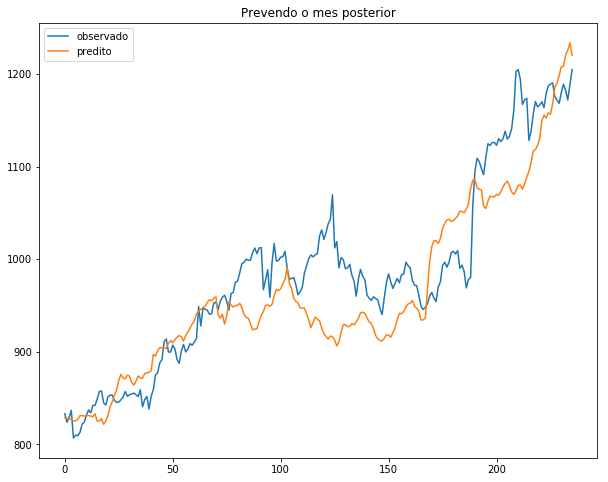

In [72]:
plt.figure(figsize=(10,8))
plt.title('Prevendo o mes posterior')
plt.plot(np.arange(0,len(pred_test)),df.loc[1000:1235]['open'], label = 'observado')
plt.plot(pred_test, label = 'predito')
plt.legend()
plt.show()

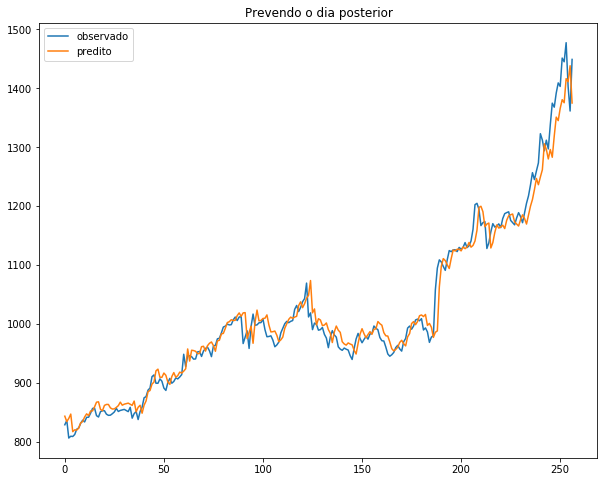

In [66]:
plt.figure(figsize=(10,8))
plt.title('Prevendo o dia posterior')
plt.plot(np.arange(0,len(pred_test)),df.loc[1002:]['open'], label = 'observado')
plt.plot(pred_test, label = 'predito')
plt.legend()
plt.show()